# Einleitung

Der vorliegende Datensatz wurde folgender Quelle entnommen: (https://www.kaggle.com/uciml/pima-indians-diabetes-database) und enthält einen Auszug aus dem Datensatz des "National Institute of Diabetes and Digestive and Kidney Diseases". Die enthaltenen Daten bestehen aus diagnostischen Messungen im Zusammenhang mit einer möglichen Diabetiserkrankung. Sie beziehen sich speziell auf weibliche Patientinnen, welche älter als 21 Jahre sind und Pima-Indischen Abstammung sind.

Der Datensatz umfasst 768 Einträge (Stand Jan. 2022) und setzt sich aus den folgenden 9 Attributen zusammen:

<ul>
<li>Pregnancies: Anzahl an Schwangerschaften</li>
<li>Glucose: Blutzuckerspiegel</li>
<li>BloodPressure: Blutdruck</li>
<li>SkinThickness: Messwert für die Dicke der Haut</li>
<li>Insulin: Insulinspiegel</li>
<li>BMI: Body Mass Index</li>
<li>DiabetesPedigreeFunction: Kennzahl für den Einfluss erblich bedingter Diabetis</li>
<li>Age: Alter der Patientin</li>
<li>Outcome: Diabetis-Diagnose (0: negative, 1: positive)</li>
</ul>

Die Zielsetzung besteht in der Erstellung eines NN-Modells, welches in der Lage ist eine Diabetiserkrankung zu erkennen. Mit Blick auf die geringe Komplexität des Datensatzes und der Aufgabenstellung, ist der Einsatz von DeepLearning vermutlich unnotwendig, da einfachere ML-Algorithmen zur Klassifikation das Problem genauso gut lösen könnten. Es handelt sich hierbei lediglich um ein simples Demostrativbeispiel für den Einsatz von sequentiellen Tensorflow/Keras Modellen.

**Keywords: Neural Network Classification**

# Pakage Import & Data Read In

In [1]:
import sys

import numpy as np
import pandas as pd

from scipy.stats import uniform, loguniform, randint, reciprocal, rayleigh

import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

import sklearn
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks

In [2]:
# csv einlesen
df_original = pd.read_csv('diabetes.csv')
df_original.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Datenexploration

Der folgende Abschnitt enthält eine Inspektion aller Attribute bei der Probleme, Besonderheiten und Zusammenhänge in den Daten identifiziert werden. Am Datensatz selber werden keine nachhaltigen Änderungen vorgenommen. Es werden lediglich Strategien entwickelt, welche später dazu eingesetz werden die Daten für das Machine Learning vorzubereiten.

In [3]:
df_full = df_original.copy()

In [4]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df_full.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


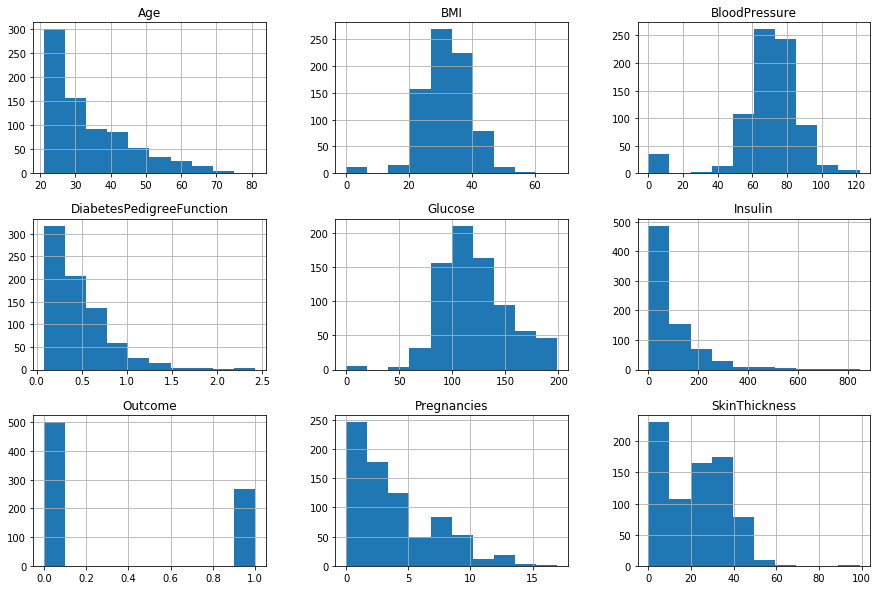

In [30]:
df_full.hist(figsize=(15,10));

In [7]:
(df_full == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

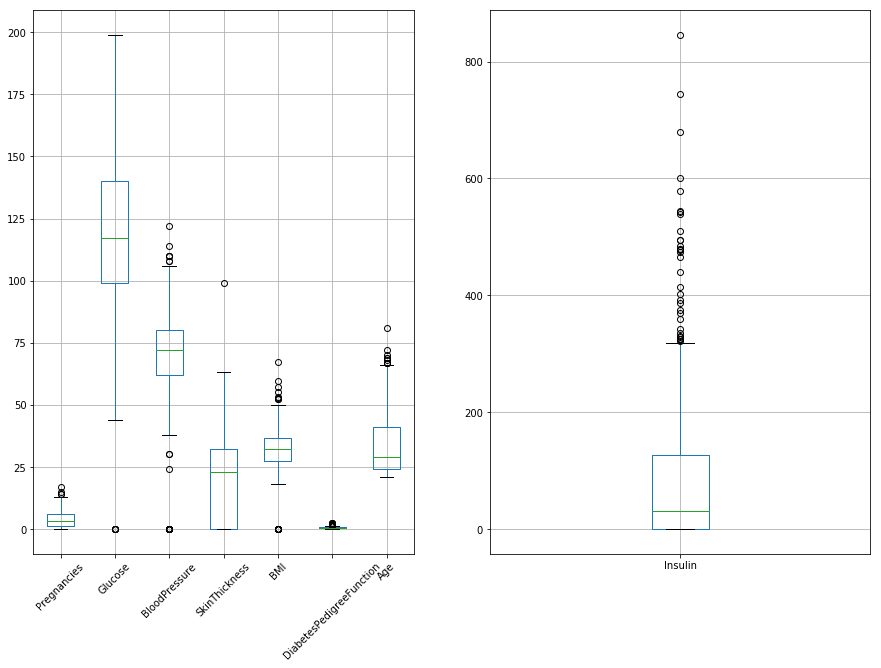

In [8]:
f, ax = plt.subplots(1, 2, figsize=(15,10))
df_full.drop(columns=['Insulin', 'Outcome']).boxplot(ax=ax[0])
df_full.Insulin.to_frame().boxplot(ax=ax[1])
ax[0].tick_params(axis='x', rotation=45);

Alle neun Datenatrribute liegen in numerischer Form vor und enthalten augenscheinlich keine fehlenden Werte im Sinne von NaNs. Bei näherer Betrachtung fällt auf, dass einige Attribute vermehrt Nullwerte aufweisen, welche medizinisch gesehen unrealistisch sind. Blutzuckerwerte, BMIs, etc. von exakt 0 sind unmöglich und müssen als Platzhalter für fehlende Werte interpretiert werden. Diese zu interploieren wird kaum möglich sein.

Weiter sind alle Attribute sehr ungleichmäßig verteilt. Einige folgen einer Art Gaußverteilung, einige weisen einen exponentilellen Abfall auf und wieder andere zeichen sich durch einen eher unregelmäßigen Verlauf aus. Die Unterrepresentation einiger Wertebereiche in den Trainingsdaten, kann dazu führen, dass ein Modell welches mit solchen Daten trainiert wird eine stellenweise schlechte Vorhersagequalität entwickelt.

Sowohl das Problem fehlender Werte als auch die ungleichmäßige Verteilung der Datenanttribute können durch Binning behoben werden. Hierzu werden alle numerischen Daten in Quantile unterteilt und fortan als kategorische Daten behandelt. Eine weitere zusätzliche Klasse wird jeweils jedem Attribut zugeordnet, welche exklusiv die Nullwerte aufnimmt.

Das Zielattribut 'Outcome' ist binärer Natur. Und kann die Werte 0 für einen negativen Diabetis-Befund und 1 für einen positiven Befund annehmen. Die beiden Klassen 0 und 1 liegen im Verhältniss 2:1 vor. Diese Ungleichgewichtung ist jedoch nicht zu gravierend.

In [9]:
# berechne Korrelationsmatrix aller Attribute
# spearman Korrelation berücksichtigt auch nicht-lineare Korrelationen
df_full.corr(method='spearman').style.background_gradient(cmap='coolwarm', axis=None)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1,0.130734,0.185127,-0.0852223,-0.126723,0.000132147,-0.0432415,0.607216,0.198689
Glucose,0.130734,1,0.235191,0.0600222,0.213206,0.231141,0.0912934,0.285045,0.475776
BloodPressure,0.185127,0.235191,1,0.126486,-0.00677057,0.29287,0.0300463,0.350895,0.142921
SkinThickness,-0.0852223,0.0600222,0.126486,1,0.541,0.443615,0.18039,-0.0667949,0.0897278
Insulin,-0.126723,0.213206,-0.00677057,0.541,1,0.192726,0.22115,-0.114213,0.0664716
BMI,0.000132147,0.231141,0.29287,0.443615,0.192726,1,0.141192,0.131186,0.309707
DiabetesPedigreeFunction,-0.0432415,0.0912934,0.0300463,0.18039,0.22115,0.141192,1,0.0429086,0.175353
Age,0.607216,0.285045,0.350895,-0.0667949,-0.114213,0.131186,0.0429086,1,0.30904
Outcome,0.198689,0.475776,0.142921,0.0897278,0.0664716,0.309707,0.175353,0.30904,1


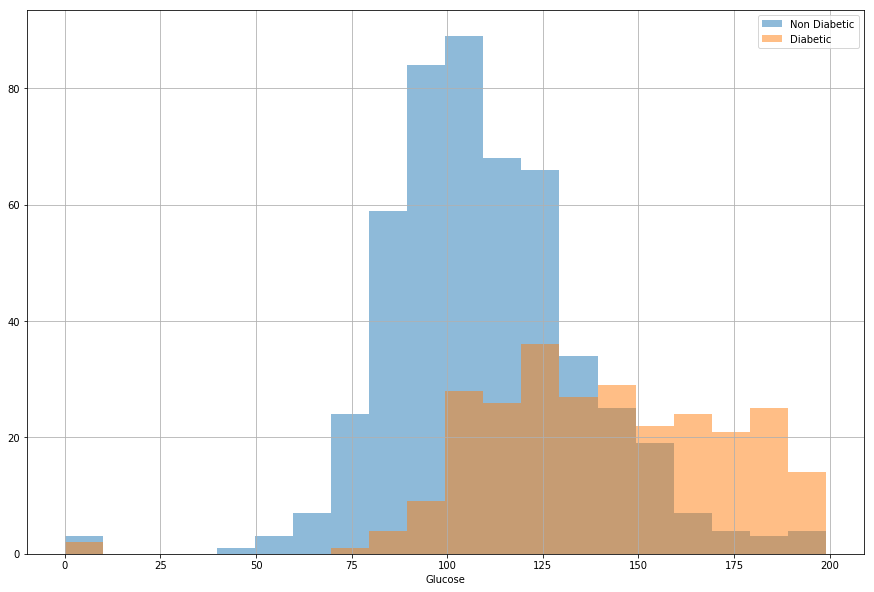

In [10]:
# vorab Festlegung der Bins; einheitliche Verwendung über alle Subplots
_, bins = np.histogram(df_full.Glucose, bins=20)

f, ax = plt.subplots(figsize=(15,10))
df_full[df_full.Outcome == 0].Glucose.hist(label='Non Diabetic', ax=ax, bins=bins, alpha = 0.5)
df_full[df_full.Outcome == 1].Glucose.hist(label='Diabetic', ax=ax, bins=bins, alpha = 0.5)
ax.legend()
ax.set_xlabel('Glucose');

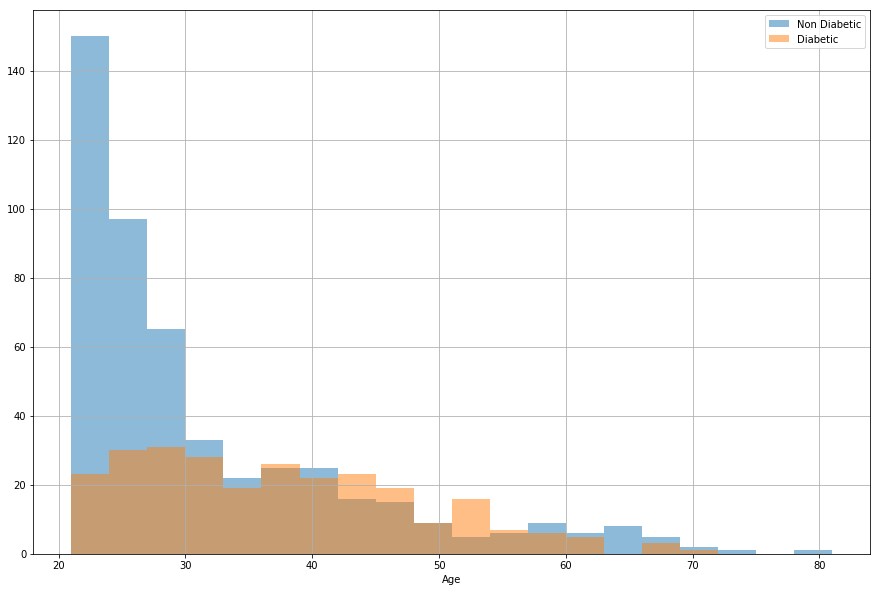

In [11]:
# vorab Festlegung der Bins; einheitliche Verwendung über alle Subplots
_, bins = np.histogram(df_full.Age, bins=20)

f, ax = plt.subplots(figsize=(15,10))
df_full[df_full.Outcome == 0].Age.hist(label='Non Diabetic', ax=ax, bins=bins, alpha = 0.5)
df_full[df_full.Outcome == 1].Age.hist(label='Diabetic', ax=ax, bins=bins, alpha = 0.5)
ax.legend()
ax.set_xlabel('Age');

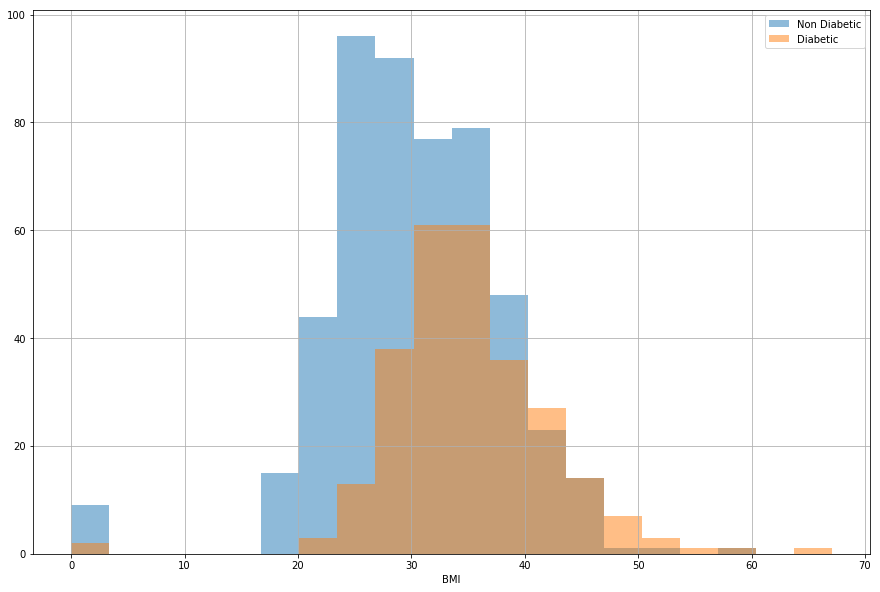

In [12]:
# vorab Festlegung der Bins; einheitliche Verwendung über alle Subplots
_, bins = np.histogram(df_full.BMI, bins=20)

f, ax = plt.subplots(figsize=(15,10))
df_full[df_full.Outcome == 0].BMI.hist(label='Non Diabetic', ax=ax, bins=bins, alpha = 0.5)
df_full[df_full.Outcome == 1].BMI.hist(label='Diabetic', ax=ax, bins=bins, alpha = 0.5)
ax.legend()
ax.set_xlabel('BMI');

Das Zielattribut 'Outcome' korreliert schwach mit dem Blutzuckerwert und sehr schwach mit BMI und Alter. Dies entspricht dem, was allgemein vermutet werden würde. Weitere erwähnenswerte Korrelationen mit der Zielgröße sind nicht erkennbar. Überreaschenderweise scheint der Insulinwert in keinem Zusammenhang mit dem Diabetisbefund zu stehen.

# Daten Vorverarbeitung

Die durch die Datenexploration gewonnen Erkenntnisse werden genutz um Datenpipelines zu entwerfen. Diese sollen den ursprünglichen Datensatz in 'df_original' in Feature/Label und Training/Test aufteilen, sowie alle Daten bereinigen und in eine für ML-Algorithmen brauchbare Form bringen.

In [13]:
class NumericalBucketizer(BaseEstimator, TransformerMixin):
    '''
    Bint numerische Daten in 5 buckets:
    [0]
    ]0 - 0.25 Quantil]
    ]0.25 Quantil - 0.5 Quantil]
    ]0.5 Quantil - 0.75 Quantil]
    ]0.75 Quantil - unendlich]
    Quantile werden anhand der Trainingsdaten (>0) ermittelt.
    Die 'fit_transform' Methode wird benutz um die Quantile zu berechnen und zu speichern. 
    Anschließend werden die Quantilgrenzen direkt zum Teilen der Daten verwendet.
    Werte <= werden dem Nullbin zugeordnet
    --- X = numericalbucketizer.fit_trandform(training_data) ---
    Für die Testdaten führt die 'transform' Methode die Teilung auf Basis der bereits etablierten
    Quantilgrenzen durch.
    --- X = numericalbucketizer.fit_trandform(test_data) ---
    '''
    def __init__(self):
        self.quantiles = {}
    def fit(self, X, y = None):
        for col in X.columns:
            self.quantiles[col] = {'1': X[X[col] > 0][col].quantile(0.25),
                                   '2': X[X[col] > 0][col].quantile(0.5),
                                   '3': X[X[col] > 0][col].quantile(0.75),
                                   '4': np.inf}
        return self
    def transform(self, X, y = None):
        X_new = X.copy()
        for col in X.columns:
            X_new[col] = pd.cut(X_new[col], [-1,
                                             0,
                                             self.quantiles[col]['1'],
                                             self.quantiles[col]['2'],
                                             self.quantiles[col]['3'],
                                             self.quantiles[col]['4']])        
        return X_new.astype(str).values

In [14]:
preprocessing_pipe = Pipeline([
                                ('NumericalBucketizer', NumericalBucketizer()),
                                ('OneHotEncoder', OneHotEncoder(sparse=False)),
                            ])

# Model Training

## Schritt 1: Bereitstellung der Trainings- und Testdaten

In [15]:
# durchmische Daten
df_data = shuffle(df_original)

# spalte 20% der Daten als Test-Sample zur finalen Evaluation des Models ab
# trenne Zielgröße 'Outcomer' vom Rest des Datensatzes
train_set, test_set = train_test_split(df_data, test_size=0.2, random_state=42, stratify=df_data.Outcome)
    
# trenne Daten ohne Zielgröße (X) von Zielgröße (y)
X_train = train_set.drop(columns='Outcome')
y_train = train_set['Outcome']
X_test = test_set.drop(columns='Outcome')
y_test = test_set['Outcome']

In [16]:
# wende feature preprocessing auf Daten X an
X_train_prep = preprocessing_pipe.fit_transform(X_train)
X_test_prep = preprocessing_pipe.transform(X_test)

# encodiere target Daten y
enc = LabelEncoder()
y_train_enc = enc.fit_transform(y_train.ravel())
y_test_enc = enc.transform(y_test.ravel())

In [17]:
X_train_prep.shape

(614, 38)

## Schritt 2: Training eines ersten nn modles

Initiale default parameter:

<ul>
<li>2 schichten</li>
<li>256 knoten</li>
<li>early stopping</li>
<li>keine regularisierung</li>
<li>kein dropout</li>
<li>keine batchnormalisierung</li>
<li>aktivierungsfunktion relu</li>
<li>optimierer adam</li>
</ul>

In [18]:
def compile_fit_evaluate(X, y, learning_rate: float = 0.001, l2_reg_factor: float = 1., num_layers: int = 2,
                         layer_size: int = 256, acti_func: str = 'relu', drop_rate: float = 0.3, opt = 'Adam',
                         loss: str = 'binary_crossentropy', metric: str = 'accuracy', val_split: float = 0.2,
                         batch_size: int = 16, epochs: int = 100, patience: int = 10, min_delta: float = 0.001,
                         restore_best_weights: bool = True, use_dropout: bool = False,
                         use_batch_normalization: bool = False, use_l2_reg: bool = False, verbose: int = 0):
    '''
    Routine zum Konstruieren und Trainieren eines simplen nn Models und zur Evaluation der
    Model-Performance während des Trainingsprozeses

    X:                         Trainingsdaten
    y:                         Zielgröße zu den Trainingsdaten
    learning_rate:             Änderungsrate der Gewichte pro Durchlauf
    l2_reg_factor:             Stärke der L2 Regularisierung
    num_layers:                Anzahl der versteckten Schichten
    layer_size:                Anzahl an Neuronen pro Schicht
    acti_func:                 non-lineare Aktivierungsfunktion der Neuronen
    drop_rate:                 Wahrscheinlichkeit für das Auslassen eines Neurons pro Trainingsschritt
    opt:                       Minimalisierungs-Algorithmus für die Anpassung der Gewichte
    loss:                      Verlustfunktion für die Anpassung der Gewichte
    metric:                    Metrik zur Bemessung der Vorhersagequalität
    val_split:                 Anteil der Validierungsdaten am Trainingsdatenimput
    batch_size:                Größe eines Datensegments des Gesamtinputs welches pro Trainigsschritt verarbeitet wird
    epochs:                    Anzahl an Iterationen über den gesamten Datensatz
    patience:                  Anzahl an aufeinanderfolgenden Epochen bevor das Training wegen zu geringem Trainingsfortschritt abgebrochen wird
    min_delta:                 Grenzwert für den differentielen Trainingserfolg zwischen zwei aufeinanderfolgenden Epochen
    restore_best_weights:      Determinator für das Wiederherstellen des erfolgreichsten Modells nach EarlyStopping
    use_dropout:               Determinator für die Verwendung von Dropout
    use_batch_normalization:   Determinator für die Verwendung von BatchNormalisierung
    use_l2_reg:                Determinator für die Verwendung von L2-Regularisierung
    verbose                    Ausführlichkeit des Konsolen-Outputs
    '''
    
    input_shape = [X.shape[1]]
    
    # Aufbau der Netzwerk Topologie
    assert num_layers >= 1
    model = keras.Sequential() 
     
    # erste Schicht    
    if use_l2_reg:                     # eigentliche Schicht mit Neuronen (mit oder ohne Regularisierung)
        model.add(layers.Dense(layer_size,
                               activation=acti_func,
                               kernel_regularizer=tf.keras.regularizers.l2(l2_reg_factor),
                               input_shape=input_shape))
    else:
        model.add(layers.Dense(layer_size,
                               activation=acti_func,
                               input_shape=input_shape))
    
    if use_dropout: model.add(layers.Dropout(drop_rate))                   # drop out Schicht lässt Nuronen aus mit p=drop_rate
    if use_batch_normalization: model.add(layers.BatchNormalization())     # batch normalization Schicht normalisiert den Output
    
    # füge zusätzliche Schichten hinzu   
    for _ in range(num_layers-1):      
        if use_l2_reg:
            model.add(layers.Dense(layer_size,
                                   activation=acti_func,
                                   activity_regularizer=tf.keras.regularizers.l2(l2_reg_factor)))
        else:
            model.add(layers.Dense(layer_size, activation=acti_func))
        if use_dropout: model.add(layers.Dropout(drop_rate))
        if use_batch_normalization: model.add(layers.BatchNormalization())
            
    model.add(layers.Dense(1, activation='sigmoid'))           # ouput Schicht mit einzelnem Neuron zur Klassifikation
    

    # wähle Optimierer und Loss-Funktion
    model.compile(
        optimizer=opt,
        loss=loss,
        metrics=[metric]
    )
    
    # definiere callback Funktion für early-stopping-Option während des Trainings
    early_stopping = keras.callbacks.EarlyStopping(
    patience=patience,
    min_delta=min_delta,
    restore_best_weights=restore_best_weights,
    )

    # definiere Trainingsprozess und führe aus
    # gebe Traingshistorie und Modell zurück
    # history.history = dict mit loss, metric, val_loss, val_metric
    history = model.fit(
        X, y,
        validation_split=val_split,
        batch_size=batch_size,
        epochs=epochs,
        callbacks=[early_stopping],
        verbose=verbose
    )
    
    return history, model

Minimum Validation Accuracy: 0.8293


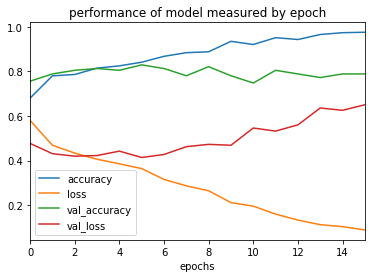

In [19]:
history, model = compile_fit_evaluate(X_train_prep, y_train_enc)

# plotte Model Loss während des Trainingsprozesses
history_df = pd.DataFrame(history.history)
history_df.plot()
plt.xlabel('epochs')
plt.title('performance of model measured by epoch')

# Ausgabe des besten aufgezeichneten Validationsergebnisses
print("Minimum Validation Accuracy: {:0.4f}".format(history_df['val_accuracy'].max()))

Das erste Modell erziehlt auf dem Validierungsdatensatz eine Genauigkeit von maximal 83%. Dieses Resultat ist nicht schlecht, aber ausbaufähig. Zudem zeigt das Modell eine klare Tendenz zum Overfitting, da die Performance auf dem Validierungsdatensatz bereits nach wenigen Epochen abnimmt.

Der erste Ansatz zur Hyperparameteroptimierung besteht in der Exploration verschiedener Netzwerktopologien. Hierzu werden Tiefe und Breite des Netzwerkes variiert und die resultierende Performance aufgezeichnet.

In [20]:
# durchlaufe n trainingsdurchläufe mit variierenden hyperparametern
number_of_draws = 30

# liste der verwendeten hyperparameter und korrespondierenden resultate
results = []
# liste der trainingshistorien
outputs = []

# statistische verteilung der hyperparameter
param_dists = {'num_layers': randint(low=1, high=4),
        'layer_size': randint(64, 512)
    }

# ziehe Hyperparamter zufällig und trainiere modell; wiederhole n mal
for i in range(number_of_draws):
    sys.stdout.write('\rExecuting run %i out of %i' %(i+1, number_of_draws))
    num_layers = int(param_dists['num_layers'].rvs())
    layer_size = int(param_dists['layer_size'].rvs())
    
    # training
    history, model = compile_fit_evaluate(X_train_prep,
                                          y_train_enc,
                                          num_layers=num_layers,
                                          layer_size=layer_size)
    
    # dokumentiere verwendete hyperparameter
    results.append({
        'num_layers': num_layers,
        'layer_size': layer_size,
        'epochs': np.array(history.history['val_loss']).shape[0],
        'score': np.array(history.history['val_accuracy']).max()
    })
    
    # speichere trainingshistorie und modell
    outputs.append((history, model))
    sys.stdout.flush()

# sortiere hyperparametersets nach score
score_board = pd.DataFrame(results)
print(score_board.sort_values(by='score', ascending=False))

Executing run 30 out of 30    epochs  layer_size  num_layers     score
7       12         192           3  0.845528
29      16         477           1  0.837398
6       19         274           1  0.837398
17      17         372           1  0.837398
24      20         233           1  0.837398
11      13         198           3  0.837398
18      20         287           1  0.837398
26      12         413           2  0.837398
5       12         438           3  0.829268
25      13         359           2  0.829268
10      12         265           3  0.829268
4       23          71           1  0.829268
1       15          98           2  0.829268
20      17          67           3  0.829268
28      19         267           1  0.829268
9       15         255           2  0.829268
19      12         352           3  0.821138
23      17         432           1  0.821138
21      13         243           3  0.821138
15      28          64           1  0.821138
14      14         275       

Text(0.5, 1.0, 'performance of model measured by epoch')

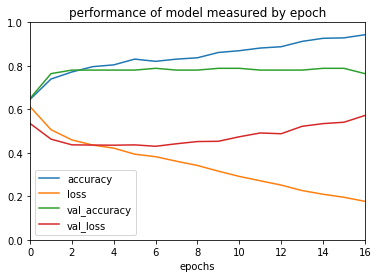

In [21]:
# extrahiere trainingshistorie für bestes set
best_hisory = outputs[score_board.sort_values(by='score').index[0]][0]

# plote modellperfomance per epoche
history_df = pd.DataFrame(best_hisory.history)
history_df.plot()
plt.xlabel('epochs')
plt.ylim(0.,1.)
plt.title('performance of model measured by epoch')

In [22]:
# extrahiere und speichere beste hyperparameter
best_hyperparams = score_board.sort_values(
    by='score', ascending=False)[['num_layers','layer_size']].iloc[0].astype(int).to_dict()
best_hyperparams

{'layer_size': 192, 'num_layers': 3}

Ein neuronales Netz aus drei Schichten a 192 Einheiten führt zu einer leicht besseren Genauigkeit von 84%. Overtraining ist nach wie vor ein Problem.

Die gefundenen Ergebnisse werden weiterverwendet. Gleichzeitig werden Dropout und BatchNormalisierung ausprobiert, in der Hoffnung, dass hierdurch Overtraining reduziert wird.

In [23]:
number_of_draws = 20

results = []
outputs = []

param_dists = {'use_dropout': [True, False],
        'use_batch_normalization': [True, False]
    }

for i in range(number_of_draws):
    sys.stdout.write('\rExecuting run %i out of %i' %(i+1, number_of_draws))
    use_dropout = np.random.choice(param_dists['use_dropout'])
    use_batch_normalization = np.random.choice(param_dists['use_batch_normalization'])
    
    history, model = compile_fit_evaluate(X_train_prep,
                                          y_train_enc,
                                          use_dropout=True,
                                          use_batch_normalization=True,
                                          **best_hyperparams)
    
    results.append({
        'use_dropout': use_dropout,
        'use_batch_normalization': use_batch_normalization,
        'epochs': np.array(history.history['val_loss']).shape[0],
        'score': np.array(history.history['val_accuracy']).max()
    })
    outputs.append((history, model))
    sys.stdout.flush()
    
score_board = pd.DataFrame(results)
print(score_board.sort_values(by='score', ascending=False))

Executing run 20 out of 20    epochs     score  use_batch_normalization  use_dropout
13      23  0.845528                     True         True
10      25  0.829268                    False        False
3       21  0.829268                     True        False
2       17  0.821138                    False        False
16      27  0.821138                    False        False
5       24  0.821138                     True         True
7       21  0.821138                     True        False
1       21  0.813008                    False        False
14      21  0.813008                    False         True
0       21  0.813008                     True         True
9       19  0.813008                     True        False
8       25  0.804878                    False         True
6       25  0.804878                    False        False
4       20  0.804878                    False         True
17      25  0.804878                    False        False
19      22  0.804878          

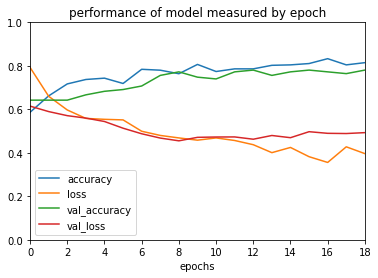

In [24]:
best_hisory = outputs[score_board.sort_values(by='score').index[0]][0]

history_df = pd.DataFrame(best_hisory.history)
history_df.plot()
plt.xlabel('epochs')
plt.ylim(0.,1.)
plt.title('performance of model measured by epoch')

best_hyperparams_old = best_hyperparams
best_hyperparams = score_board.sort_values(
    by='score', ascending=False)[['use_dropout', 'use_batch_normalization']].iloc[0].to_dict()
best_hyperparams.update(best_hyperparams_old)

Der Einsatz von DropOut und BatchRegularisierung verbessert zwar nicht die Genauigkeit aber reduziert den Effekt des Overtrainings sichtlich, wodurch das Modell vermutlich den Datensatz besser verallgemeinert. Allerdings führt das Dropout scheinbar zu einer stärkeren Fluktuation der Lernkurve.

Weiter Hyperparameter die zu einer weiteren Verbesserung beitragen könnten sind die Ausfallwahrscheinlichkeit des Dropouts und die Stärke der L2-Regulariserung der Gewichte.

Darüber hinaus werden verschiedene Optionen für die Aktivierungsfunktion und den Optimierer erprobt.

Executing run 60 out of 60    drop_rate  epochs  l2_reg_factor     score  use_l2_reg
22   0.358528      26       0.001250  0.853659       False
0    0.718051      88       0.029330  0.837398       False
10   0.456286      37       0.032380  0.837398       False
27   0.486656      36       0.000556  0.837398        True
15   0.662494      63       0.000118  0.837398        True
53   0.373584      27       0.002911  0.829268       False
16   0.751063      86       0.000512  0.829268       False
49   0.302182      26       0.000155  0.829268        True
43   0.164819     100       0.110331  0.821138        True
42   0.549054      36       0.006355  0.821138       False
2    0.534226      26       0.001859  0.821138        True
45   0.682888      66       0.000232  0.821138        True
13   0.617399      36       0.000210  0.821138       False
28   0.752867      91       0.000284  0.821138        True
1    0.686143      61       0.000130  0.813008        True
58   0.394871      23       0.

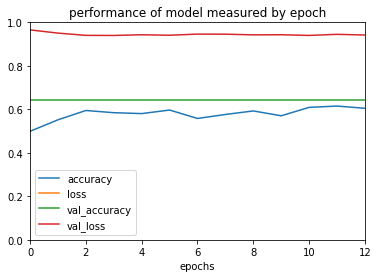

In [25]:
number_of_draws = 60

results = []
outputs = []

param_dists = {'use_l2_reg': [True, False],
        'l2': loguniform(1e-4, 0.5),
        'drop_rate': uniform(0.0, 0.8)
    }

for i in range(number_of_draws):
    sys.stdout.write('\rExecuting run %i out of %i' %(i+1, number_of_draws))
    use_l2_reg = np.random.choice(param_dists['use_l2_reg'])
    l2 = param_dists['l2'].rvs()
    drop_rate = param_dists['drop_rate'].rvs()
    
    history, model = compile_fit_evaluate(X_train_prep,
                                          y_train_enc,
                                          use_l2_reg=use_l2_reg,
                                          l2_reg_factor=l2,
                                          drop_rate=drop_rate,
                                          **best_hyperparams)
    
    results.append({
        'l2_reg_factor': l2,
        'use_l2_reg': use_l2_reg,
        'drop_rate': drop_rate,
        'epochs': np.array(history.history['val_loss']).shape[0],
        'score': np.array(history.history['val_accuracy']).max()
    })
    outputs.append((history, model))
    sys.stdout.flush()
    
score_board = pd.DataFrame(results)
print(score_board.sort_values(by='score', ascending=False))

best_hisory = outputs[score_board.sort_values(by='score').index[0]][0]

history_df = pd.DataFrame(best_hisory.history)
history_df.plot()
plt.xlabel('epochs')
plt.ylim(0.,1.)
plt.title('performance of model measured by epoch')

best_hyperparams_old = best_hyperparams
best_hyperparams = score_board.sort_values(
    by='score', ascending=False)[['l2_reg_factor', 'use_l2_reg', 'drop_rate']].iloc[0].to_dict()
best_hyperparams.update(best_hyperparams_old)

Executing run 30 out of 30   acti_func  epochs   opt     score
16      tanh      17  Adam  0.861789
7        elu      35   SGD  0.845528
9       tanh      33   SGD  0.845528
29       elu      20  Adam  0.837398
1        elu      29   SGD  0.837398
23       elu      24  Adam  0.837398
3       tanh      40   SGD  0.837398
4        elu      19  Adam  0.837398
5       tanh      26   SGD  0.837398
6       relu      64   SGD  0.837398
18      tanh      26  Adam  0.837398
11       elu      38   SGD  0.837398
26       elu      27  Adam  0.837398
17      tanh      27   SGD  0.829268
10      tanh      16  Adam  0.829268
24       elu      22  Adam  0.829268
25      relu      43   SGD  0.829268
22      relu      26  Adam  0.829268
20      tanh      16  Adam  0.829268
27      relu      47   SGD  0.821138
28      tanh      37   SGD  0.821138
15       elu      36   SGD  0.821138
19      tanh      22   SGD  0.821138
14      relu      41   SGD  0.813008
13      relu      25  Adam  0.813008
12      relu

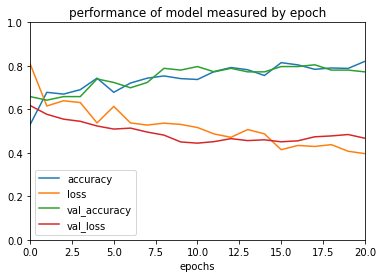

In [26]:
number_of_draws = 30

results = []
outputs = []

param_dists = {'opt': ['Adam', 'SGD'],
        'acti_func': ['relu', 'tanh', 'elu']
    }

for i in range(number_of_draws):
    sys.stdout.write('\rExecuting run %i out of %i' %(i+1, number_of_draws))
    opt = np.random.choice(param_dists['opt'])
    acti_func = np.random.choice(param_dists['acti_func'])
    
    history, model = compile_fit_evaluate(X_train_prep,
                                          y_train_enc,
                                          opt=opt,
                                          acti_func=acti_func,
                                          **best_hyperparams)
    
    results.append({
        'opt': opt,
        'acti_func': acti_func,
        'epochs': np.array(history.history['val_loss']).shape[0],
        'score': np.array(history.history['val_accuracy']).max()
    })
    outputs.append((history, model))
    sys.stdout.flush()
    
score_board = pd.DataFrame(results)
print(score_board.sort_values(by='score', ascending=False))

best_hisory = outputs[score_board.sort_values(by='score').index[0]][0]

history_df = pd.DataFrame(best_hisory.history)
history_df.plot()
plt.xlabel('epochs')
plt.ylim(0.,1.)
plt.title('performance of model measured by epoch')

best_hyperparams_old = best_hyperparams
best_hyperparams = score_board.sort_values(
    by='score', ascending=False)[['opt', 'acti_func']].iloc[0].to_dict()
best_hyperparams.update(best_hyperparams_old)

In [28]:
# evaluiere model auf trainings daten
prediction = model.predict_classes(X_train_prep).ravel()

print(classification_report(y_train_enc, prediction, target_names=enc.classes_.astype(str)))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       400
           1       0.72      0.71      0.71       214

    accuracy                           0.80       614
   macro avg       0.78      0.78      0.78       614
weighted avg       0.80      0.80      0.80       614



Eine Dropoutrate von 38% ohne L2-Regularisierung liefert die besten Ergebnisse. Mit dem Tangens Hyperbolikus als Aktivierungsfunktion und dem Adam-Solver kann eine Geanuigkeit von 85% für die Negativklasse erziehlt werden. Für die Positivklasse wird nur eine Genauigkeit von 72% erziehlt.

Abschließend wird das Modell auf den bisher ungesehenen Testdaten evaluiert.

In [27]:
# evaluiere model auf test daten
prediction = model.predict_classes(X_test_prep).ravel()

print(classification_report(y_test_enc, prediction, target_names=enc.classes_.astype(str)))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       100
           1       0.66      0.69      0.67        54

    accuracy                           0.77       154
   macro avg       0.74      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



Die Modellperfomance auf den Testdaten ist geringfügig schlechter als auf den Trainingsdaten. Leichtes Overtraining liegt somit wohl nach wie vor vor.

# Konklusion

Obwohl der Datensatz nicht sehr komplex ist und eine Vielzahl an Hyperparameterkonfigurationen getestet wurden, konnte kein Model gefunden werden, welches wirklich zur Diagnose von Diabeteserkrankungen genutz werden könnte.

Ein gutes Diagnosemodell sollte sowohl die FalschPositiv-Rate für Negativbefunde als auch die FalschNegativ-Rate für Positivbefunde minimieren. Die Effizient des besten Modells bei der Erkennung von positiven Diabetesbefunden liegt jedoch nur bei 69%, was unzureichend ist.

Es ist unbekannt, welche Genauigkeit auf dem vorliegenden Datensatz überhaupt erzielt werden kann. Ein umfangreicherer Datensatz könnte als Grundlage für das Training eines besseren Modells dienen, da der vorliegende Datensatz lediglich 786 Einträge umfasst. Eine erhöhte Verfügbarkeit von Trainingsdaten würde dem Overtraining vermutlich entgegenwirken. Mit mehr Zeit und Rechenkapazität könnte die Wahl der Hyperparameter weiter optimiert werden.